In [ ]:
import pandas as pd 

from google.colab import drive
drive.mount('/gdrive')
#Change current working directory to gdrive
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


Read the data in customer_offers.csv and set the customer_name column to the index

In [ ]:
#Read files
datafile = r'/gdrive/My Drive/Data Projects/Marketing Analytics/Lesson 3/customer_offers.csv'
customer_offers = pd.read_csv(datafile).set_index('customer_name') #creates a dataframe
customer_offers.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
customer_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
Allen,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Anderson,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
Bailey,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Baker,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn import cluster

model = cluster.KMeans(n_clusters=3, random_state=10)
cluster = model.fit_predict(customer_offers)

offer_cols = customer_offers.columns #give all the columns a single name

customer_offers['cluster'] = cluster
customer_offers.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,cluster
customer_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
Allen,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
Anderson,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,2
Bailey,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Baker,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1


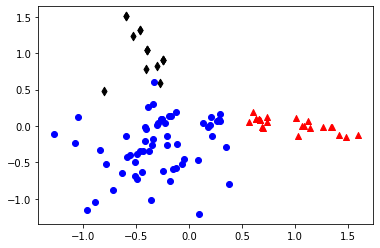

In [ ]:
from sklearn import decomposition
import matplotlib.pyplot as plt
%matplotlib inline

pca = decomposition.PCA(n_components=2)
customer_offers['pc1'], customer_offers['pc2'] = zip(*pca.fit_transform(customer_offers[offer_cols]))

colors = ['r', 'b', 'k', 'g']
markers = ['^', 'o', 'd', 's']

for c in customer_offers['cluster'].unique():
    d = customer_offers[customer_offers['cluster'] == c]
    plt.scatter(d['pc1'], d['pc2'], marker=markers[c], color=colors[c])

plt.show()

In [ ]:
#Read files
datafile = r'/gdrive/My Drive/Data Projects/Marketing Analytics/Lesson 3/offer_info.csv'
offer_info = pd.read_csv(datafile) #creates a dataframe
offer_info.head()

,offer_id,varietal
0,1,Malbec
1,2,Pinot Noir
2,3,Espumante
3,4,Champagne
4,5,Cabernet Sauvignon


In [ ]:
total_proportions = customer_offers[offer_cols].mean() #mean of all the offers

for i in range(3):
    cluster_df = customer_offers[customer_offers['cluster'] == i]
    cluster_proportions = cluster_df[offer_cols].mean()

    diff = cluster_proportions - total_proportions
    cluster_rep_offers = list(diff.sort_values(ascending=False).index.astype(int)[0:5])
    print(offer_info.loc[offer_info['offer_id'].isin(cluster_rep_offers),'varietal'])

6         Prosecco
7        Espumante
17       Espumante
28    Pinot Grigio
29          Malbec
Name: varietal, dtype: object
3     Champagne
5      Prosecco
10    Champagne
21    Champagne
30    Champagne
Name: varietal, dtype: object
1     Pinot Noir
16    Pinot Noir
22    Chardonnay
23    Pinot Noir
25    Pinot Noir
Name: varietal, dtype: object


Clustering Observations:

The clusters are defined by the customers wine preferences. 

*  Cluster 1 prefers champagne and prosecco, a sparkling wine similar to champagne
*   Cluster 2 prefers a red wine
* Cluster 0 customers appear to not have a preference, containing a mix

The preferences of Cluster 1 and 2 can be used for personalized marketing efforts. 

